<a href="https://colab.research.google.com/github/ntanphu/CST-KHMT-HK251/blob/main/Members/NguyenTanPhu/Yogi_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thuật toán tối ưu Yogi [[D2L (Section: 12.10.3)](https://d2l.ai/chapter_optimization/adam.html)]

Mặc dù Adam thường cho tốc độ hội tụ nhanh và hiệu quả thực nghiệm tốt, thuật toán này vẫn tồn tại hạn chế quan trọng đến từ cơ chế tích lũy moment bậc hai. Do moment này được cập nhật theo dạng trung bình động của các bình phương gradient không âm, nó có xu hướng tăng đơn điệu và dễ bị ảnh hưởng mạnh bởi một số giá trị gradient đột biến. Khi moment bậc hai phình to, bước cập nhật bị thu nhỏ một cách bất thường, khiến quá trình tối ưu hóa trở nên chậm hoặc thậm chí không tiến đến nghiệm mong muốn. Để khắc phục những hạn chế của Adam, Zaheer et al. (2018) đã đề xuất thuật toán Yogi, với mục tiêu chính: kiểm soát sự tăng lên không mong muốn của moment bậc hai, từ đó ổn định bước cập nhật.

Thay vì sử dụng moment bậc hai tăng đơn điệu như Adam, Yogi cập nhật:

\begin{equation}
	v_t = v_{t-1} + (1 - \beta_2) g_t^2 \, \mathrm{sgn}(g_t^2 - v_{t-1}),
\end{equation}

trong đó $\mathrm{sgn}(\cdot)$ là hàm dấu.

Ý nghĩa toán học:

*   Nếu $g_t^2 > v_{t-1}$, Yogi tăng $v_t$ một lượng nhỏ.
*   Nếu $g_t^2 < v_{t-1}$, Yogi giảm $v_t$, giúp moment bậc hai không bị phình to.
*   $v_t$ có xu hướng tiến về giá trị cân bằng phản ánh trung bình thực sự của gradient.

Moment bậc nhất vẫn giống Adam:
\begin{equation}
	m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t.
\end{equation}

Cập nhật tham số:
\begin{equation}
	\theta_{t+1} = \theta_t - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}.
\end{equation}

Nguyên lý chính của Yogi: Yogi không cho phép moment bậc hai tăng không giới hạn, mà điều chỉnh động theo quan hệ giữa $g_t^2$ và $v_{t-1}$. Điều này giúp: Bảo toàn sự ổn định của learning rate hiệu dụng; Tránh hiện tượng bước cập nhật bị triệt tiêu; Cải thiện hành vi hội tụ so với Adam, đặc biệt trong điều kiện gradient nhiễu hoặc xuất hiện không thường xuyên. Để hiện thực hóa cơ chế kiểm soát moment bậc hai như đã phân tích, thuật toán Yogi được xây dựng với các bước cập nhật cụ thể sau đây.

---
Algorithm 1. YOGI

---
**Input:** Initial point $x_1 \in \mathbb{R}^d$, learning rates $\{\eta_t\}_{t=1}^T$, hyperparameters $0 < \beta_1,\beta_2 < 1$, $\varepsilon > 0$  

**Initialize:** $m_0 = 0$, $v_0 = 0$

**For** $t = 1$ **to** $T$:

1. Sample $s_t$ from data distribution $P$
2. Compute stochastic gradient:  
   $
   g_t = \nabla_x \ell(x_t, s_t)
   $
3. Update first moment estimate:  
   $
   m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t
   $
4. Update second moment estimate (Yogi update):  
   $
   v_t = v_{t-1} + (1-\beta_2)\, g_t^2\, \mathrm{sgn}(g_t^2 - v_{t-1})
   $
5. Update parameters:  
   $
   x_{t+1} = x_t - \eta_t \frac{m_t}{\sqrt{v_t} + \varepsilon}
   $

**End For**

---

**Thuật toán 1** mô tả mã giả của **YOGI**, trong đó quy tắc cập nhật có hình thức gần giống **ADAGRAD** nhưng khác biệt quan trọng nằm ở việc sử dụng hàm dấu $ \operatorname{sgn}(g_t^2 - v_{t-1}) $. Tương tự **ADAM**, tham số $ \varepsilon $ đóng vai trò điều chỉnh mức độ thích nghi của phương pháp. Sự khác nhau giữa hai thuật toán chủ yếu xuất hiện ở bước cập nhật mô-men bậc hai $ v_t $.

Trong YOGI, thay đổi $ v_t - v_{t-1} $ được tính bằng:

$$
(1 - \beta_2)\, g_t^{2}\, \operatorname{sgn}(g_t^{2} - v_{t-1})
$$

trong khi ở ADAM, thay đổi này là:

$$
-(1 - \beta_2)\,(v_{t-1} - g_t^{2})
$$

Cả hai thuật toán đều duy trì đặc tính: $ v_t $ chỉ phụ thuộc vào $ v_{t-1} $ và giá trị $ g_t^2 $ tại thời điểm hiện tại. Tuy nhiên, không giống ADAM, biên độ cập nhật trong YOGI chỉ bị chi phối bởi $ g_t^2 $, thay vì phụ thuộc đồng thời vào cả $ v_{t-1} $ và $ g_t^2 $. Điều này giúp YOGI điều chỉnh mô-men bậc hai một cách thận trọng hơn.

Khi $ v_{t-1} $ lớn so với $ g_t^2 $, cả ADAM lẫn YOGI đều làm tăng tốc độ học hiệu dụng. Tuy vậy, ADAM có thể khiến tốc độ học tăng quá nhanh, trong khi YOGI chỉ tăng ở mức vừa phải và dễ kiểm soát hơn — một đặc điểm thường dẫn đến hiệu quả thực nghiệm tốt hơn. Trong những tình huống cần thay đổi tốc độ học mạnh hơn, YOGI vẫn có thể mô phỏng hành vi này bằng cách lựa chọn $ \beta_2 $ nhỏ hơn.

Ngoài ra, YOGI có chi phí tính toán và bộ nhớ bậc $ O(d) $, tương tự ADAM, nên dễ dàng triển khai trên quy mô lớn.


#### Minh họa sự khác biệt adam vs Yogi

Để minh họa sự khác biệt trong cách Adam và Yogi xử lý mô-men bậc hai $v_t$, một chuỗi gradient nhân tạo $|g_t|^2$ được sử dụng thay vì một hàm mất mát cụ thể. Chuỗi này bao gồm ba giá trị đầu tiên lớn ($|g_t|^2 = 1.0$) và các giá trị còn lại rất nhỏ ($|g_t|^2 = 0.01$). Cách tạo gradient như vậy mô phỏng hiện tượng “điểm bất thường” trong huấn luyện mô hình học sâu, nơi gradient có thể tăng đột ngột trong một vài bước rồi trở nên nhỏ trong giai đoạn dài.

Dựa trên chuỗi gradient này, hai thuật toán cập nhật mô-men bậc hai theo công thức:

**Adam**

$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
$$

**Yogi**

$$
v_t = v_{t-1} + (1 - \beta_2)\, g_t^2\, \operatorname{sgn}(g_t^2 - v_{t-1})
$$

Hệ số học hiệu dụng được suy ra từ mô-men bậc hai:

$$
\eta_t = \frac{1}{v_t + \varepsilon}
$$

Mục tiêu của ví dụ này là quan sát cách mỗi thuật toán phản ứng với sự thay đổi đột ngột của gradient: Adam có xu hướng làm $v_t$ suy giảm nhanh dẫn đến hệ số học tăng đột biến, trong khi Yogi điều chỉnh $v_t$ theo hướng ổn định, từ đó tạo ra hệ số học tăng chậm và có kiểm soát hơn.



#### Mã nguồn thực nghiệm



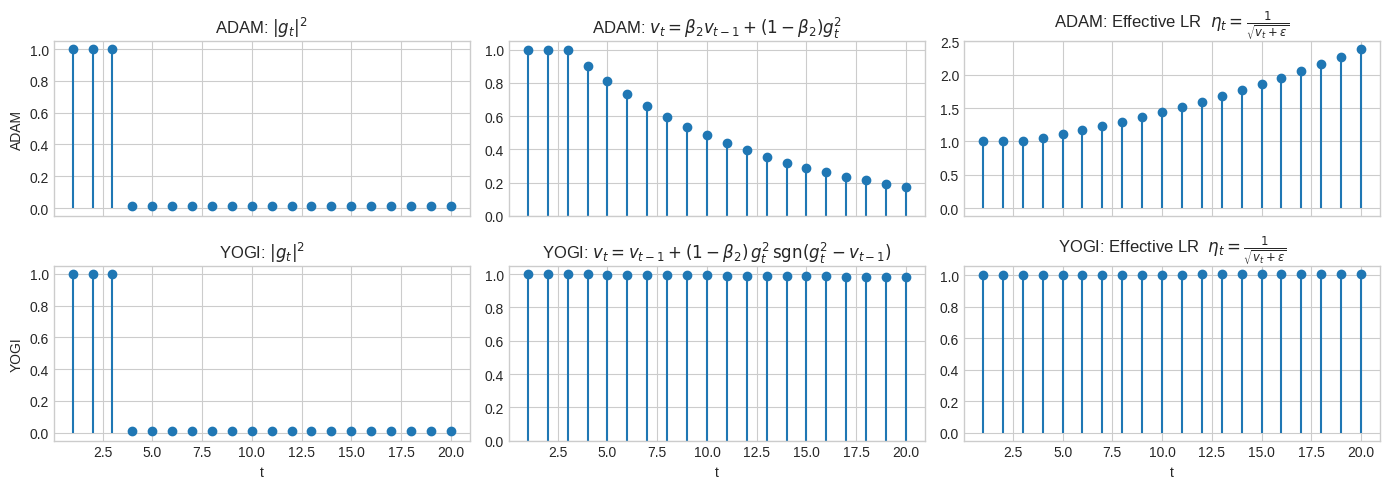

In [23]:
import numpy as np
import matplotlib.pyplot as plt

T = 20
g2 = np.array([1.0 if t < 3 else 0.01 for t in range(T)])  # 3 điểm bất thường đầu, sau đó nhỏ dần

# -----------------------------
# 2. Adam và Yogi update
# -----------------------------
def adam_update_v(g2_seq, beta2=0.9, v0=1.0):
    v = v0
    vs = []
    for g2_val in g2_seq:
        v = beta2 * v + (1 - beta2) * g2_val
        vs.append(v)
    return np.array(vs)

def yogi_update_v(g2_seq, beta2=0.9, v0=1.0):
    v = v0
    vs = []
    for g2_val in g2_seq:
        v = v - (1 - beta2) * np.sign(v - g2_val) * g2_val
        vs.append(v)
    return np.array(vs)

# -----------------------------
# 3. Compute v_t and lr effective
# -----------------------------
beta2 = 0.9
eps = 1e-3

adam_v = adam_update_v(g2, beta2)
yogi_v = yogi_update_v(g2, beta2)

adam_eta = 1.0 / np.sqrt(adam_v + eps)
yogi_eta = 1.0 / np.sqrt(yogi_v + eps)

t = np.arange(1, T+1)

# -----------------------------
# 4. Plot 6 panels with LaTeX formula in title
# -----------------------------
plt.style.use("seaborn-v0_8-whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(14, 5), sharex=True)

# ---------------- ADAM ----------------
# |g_t|^2
axes[0, 0].stem(t, g2, basefmt=" ")
axes[0, 0].set_title(r"ADAM: $|g_t|^2$")
axes[0, 0].set_ylabel("ADAM")

# v_t
axes[0, 1].stem(t, adam_v, basefmt=" ")
axes[0, 1].set_ylim(0, 1.05)
axes[0, 1].set_title(r"ADAM: $v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2$")

# learning rate
axes[0, 2].stem(t, adam_eta, basefmt=" ")
axes[0, 2].set_title(
    r"ADAM: Effective LR  $\eta_t = \frac{1}{\sqrt{v_t + \varepsilon}}$"
)

# ---------------- YOGI ----------------
axes[1, 0].stem(t, g2, basefmt=" ")
axes[1, 0].set_title(r"YOGI: $|g_t|^2$")
axes[1, 0].set_xlabel("t")
axes[1, 0].set_ylabel("YOGI")

axes[1, 1].stem(t, yogi_v, basefmt=" ")
axes[1, 1].set_ylim(0, 1.05)
axes[1, 1].set_title(
    r"YOGI: $v_t = v_{t-1} + (1-\beta_2)\, g_t^2 \, \text{sgn}(g_t^2 - v_{t-1})$"
)
axes[1, 1].set_xlabel("t")

axes[1, 2].stem(t, yogi_eta, basefmt=" ")
axes[1, 2].set_title(
    r"YOGI: Effective LR  $\eta_t = \frac{1}{\sqrt{v_t + \varepsilon}}$"
)
axes[1, 2].set_xlabel("t")

plt.tight_layout()
plt.show()


#### Kết luận:

Từ mô phỏng trên, ta rút ra:

**Adam** dễ bị ảnh hưởng mạnh bởi các spike trong gradient → làm $v_t$ giảm quá nhanh → learning rate tăng không kiểm soát → dễ gây bất ổn.

**Yogi** điều chỉnh $v_t$ theo hướng ổn định hóa, chỉ tăng hoặc giảm rất nhẹ theo sự khác biệt giữa $g_t^2$ và $v_{t-1}$.

Nhờ đó, learning rate của **Yogi** tăng chậm và đều → ổn định hơn đáng kể.

Do đó **Yogi** được xem như một phiên bản khắc phục nhược điểm của Adam, đặc biệt hữu ích trong các bài toán non-convex hoặc dữ liệu nhiễu.


### Thực nghiệm minh họa với bài toán phân loại thực tế MNIST.

In [ ]:
#Import Libraries
import time
import copy
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.dataset import random_split
from torch.utils.data.sampler import SubsetRandomSampler, SequentialSampler
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import Optimizer

In [ ]:
num_epochs = 20
num_classes = 10
batch_size = 128
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
%%capture
# =========================
# 2. DataLoader + tiền xử lý
# =========================
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

train_dataset = torchvision.datasets.MNIST('data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('data', train=False, transform=transform)

# Before
print('Train data set:', len(train_dataset))
print('Test data set:', len(test_dataset))

# Random split
train_set_size = int(len(train_dataset) * 0.8)
indices = list(range(train_set_size))
split = int(np.floor(.2 * train_set_size))
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler =  SequentialSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, sampler=train_sampler,batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(dataset=train_dataset,sampler=valid_sampler,batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)

#### Mô hình Multilayer Perceptron (MLP)

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, act_func=nn.ReLU()):
        super(NeuralNet, self).__init__()
        layers = []
        layers.append(nn.Linear(in_channels, hidden_channels[0]))
        layers.append(act_func) # activation function
        # Hidden layers
        for i in range(1, len(hidden_channels)):
            layers.append(nn.Linear(hidden_channels[i-1], hidden_channels[i]))
            layers.append(act_func) # activation function
        layers.append(nn.Linear(hidden_channels[-1], out_channels))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        out = self.net(x)
        return out

In [ ]:
def train_val_model(model, criterion, optimizer, dataloaders, num_epochs=25,
        scheduler=None, log_interval=None):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # Store losses and accuracies accross epochs
    losses, accuracies = dict(train=[], val=[]), dict(train=[], val=[])

    for epoch in range(num_epochs):
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            nsamples = 0
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.reshape(-1, 1*28*28).to(device)
                labels = labels.to(device)
                nsamples += inputs.shape[0]

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if scheduler is not None and phase == 'train':
                scheduler.step()

            #nsamples = dataloaders[phase].dataset.data.shape[0]
            epoch_loss = running_loss / nsamples
            epoch_acc = running_corrects.double() / nsamples

            losses[phase].append(epoch_loss)
            accuracies[phase].append(epoch_acc)

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        if log_interval is not None and epoch % log_interval == 0:
            print(f"Epoch {epoch+1:02d}/{num_epochs:02d} | "
                  f"train_loss={losses['train'][-1]:.4f} acc={accuracies['train'][-1]:.5f} | "
                  f"val_loss={losses['val'][-1]:.4f} acc={accuracies['val'][-1]:.5f}")

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:.5f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, losses, accuracies

In [ ]:
# =========================
# 4. Định nghĩa Yogi Optimizer
# =========================
class Yogi(Optimizer):
    def __init__(self, params, lr=1e-3,
                 betas=(0.9, 0.999),
                 eps=1e-8,
                 weight_decay=0.0):
        if lr <= 0.0:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta1 value: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta2 value: {}".format(betas[1]))

        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay)
        super(Yogi, self).__init__(params, defaults)

    @torch.no_grad()
    def step(self, closure=None):
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            lr = group["lr"]
            beta1, beta2 = group["betas"]
            eps = group["eps"]
            wd = group["weight_decay"]

            for p in group["params"]:
                if p.grad is None:
                    continue
                grad = p.grad

                if grad.is_sparse:
                    raise RuntimeError("Yogi does not support sparse gradients")

                # weight decay
                if wd != 0:
                    grad = grad.add(p, alpha=wd)

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state["step"] = 0
                    state["exp_avg"] = torch.zeros_like(p, memory_format=torch.preserve_format)
                    state["exp_avg_sq"] = torch.zeros_like(p, memory_format=torch.preserve_format)

                exp_avg, exp_avg_sq = state["exp_avg"], state["exp_avg_sq"]

                state["step"] += 1
                t = state["step"]

                # First moment (như Adam)
                exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)

                # Second moment kiểu Yogi
                grad_sq = grad * grad
                exp_avg_sq.add_(
                    (grad_sq - exp_avg_sq).sign() * grad_sq,
                    alpha=(1 - beta2)
                )

                # Bias correction
                bias_correction1 = 1 - beta1 ** t
                bias_correction2 = 1 - beta2 ** t

                denom = (exp_avg_sq / bias_correction2).sqrt().add_(eps)
                step_size = lr / bias_correction1

                p.addcdiv_(exp_avg, denom, value=-step_size)

        return loss

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
model = NeuralNet(in_channels=1*28*28, hidden_channels=[300, 200, 100], out_channels=10)
summary(model, input_size=(128, 1*28*28))

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNet                                [128, 10]                 --
├─Sequential: 1-1                        [128, 10]                 --
│    └─Linear: 2-1                       [128, 300]                235,500
│    └─ReLU: 2-2                         [128, 300]                --
│    └─Linear: 2-3                       [128, 200]                60,200
│    └─ReLU: 2-4                         [128, 200]                --
│    └─Linear: 2-5                       [128, 100]                20,100
│    └─ReLU: 2-6                         [128, 100]                --
│    └─Linear: 2-7                       [128, 10]                 1,010
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 40.55
Input size (MB): 0.40
Forward/backward pass size (MB): 0.62
Params size (MB): 1.27
Estimated Total Size (MB): 2.29

In [ ]:
optimizer_constructors = {
    "SGD": lambda params: torch.optim.SGD(params, lr=0.01),
    "SGD + Momentum": lambda params: torch.optim.SGD(params, lr=0.01, momentum=0.9),
    "SGD + Nesterov": lambda params: torch.optim.SGD(params, lr=0.01, momentum=0.9, nesterov=True),
    "RMSprop": lambda params: torch.optim.RMSprop(params, lr=learning_rate),
    "Adagrad": lambda params: torch.optim.Adagrad(params, lr=learning_rate),
    "Adadelta": lambda params: torch.optim.Adadelta(params, lr=1.0),
    "Adam": lambda params: torch.optim.Adam(params, lr=learning_rate),
    "Yogi": lambda params: Yogi(params, lr=learning_rate),
}


In [ ]:
def evaluate_testset(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(images.size(0), -1).to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = correct / total
    return acc


In [ ]:
num_epochs = 20
all_histories = {}   # lưu toàn bộ loss/acc theo epoch
summary = {}         # lưu kết quả cuối cùng (bảng)
dataloaders = dict(train=train_loader, val=valid_loader)
criterion = torch.nn.CrossEntropyLoss()

for opt_name, opt_fn in optimizer_constructors.items():
    print(f"\n===== Training with {opt_name} =====")

    # Khởi tạo lại model mới cho từng optimizer
    model = NeuralNet(in_channels=1*28*28, hidden_channels=[300, 200, 100], out_channels=10).to(device)
    optimizer = opt_fn(model.parameters())
    model, losses, accuracies = train_val_model(model, criterion, optimizer, dataloaders, num_epochs=20, log_interval=1)

    # Lưu full history
    all_histories[opt_name] = {
        "train_loss": losses["train"],
        "val_loss": losses["val"],
        "train_acc": accuracies["train"],
        "val_acc": accuracies["val"],
    }

    # Tính test_acc nếu có test_loader
    test_acc = None
    test_acc = evaluate_testset(model, test_loader, device)

    # Lưu kết quả cho bảng
    summary[opt_name] = {
        "train_loss": float(losses["train"][-1]),
        "val_loss": float(losses["val"][-1]),
        "train_acc": float(accuracies["train"][-1]),
        "val_acc": float(accuracies["val"][-1]),
        "test_acc": float(test_acc) if test_acc is not None else None,
    }



===== Training with SGD =====
Epoch 01/20 | train_loss=2.1681 acc=0.41846 | val_loss=1.7883 acc=0.63687
Epoch 02/20 | train_loss=1.0086 acc=0.76807 | val_loss=0.5870 acc=0.84542
Epoch 03/20 | train_loss=0.4913 acc=0.86336 | val_loss=0.4122 acc=0.88323
Epoch 04/20 | train_loss=0.3867 acc=0.88852 | val_loss=0.3524 acc=0.89917
Epoch 05/20 | train_loss=0.3398 acc=0.90120 | val_loss=0.3165 acc=0.91312
Epoch 06/20 | train_loss=0.3083 acc=0.91026 | val_loss=0.2922 acc=0.91979
Epoch 07/20 | train_loss=0.2830 acc=0.91708 | val_loss=0.2752 acc=0.92427
Epoch 08/20 | train_loss=0.2612 acc=0.92346 | val_loss=0.2563 acc=0.92792
Epoch 09/20 | train_loss=0.2434 acc=0.92797 | val_loss=0.2413 acc=0.93240
Epoch 10/20 | train_loss=0.2270 acc=0.93378 | val_loss=0.2286 acc=0.93437
Epoch 11/20 | train_loss=0.2118 acc=0.93854 | val_loss=0.2170 acc=0.93854
Epoch 12/20 | train_loss=0.1989 acc=0.94250 | val_loss=0.2028 acc=0.94083
Epoch 13/20 | train_loss=0.1872 acc=0.94542 | val_loss=0.1951 acc=0.94323
Epoch 1

In [ ]:
import pandas as pd

summary_df = pd.DataFrame.from_dict(summary, orient="index")
summary_df = summary_df[
    ["train_loss", "train_acc", "val_loss", "val_acc", "test_acc"]
]

summary_df.round(4)


,train_loss,train_acc,val_loss,val_acc,test_acc
SGD,0.1285,0.9623,0.1490,0.9583,0.9580
SGD + Momentum,0.0010,1.0000,0.1006,0.9784,0.9790
SGD + Nesterov,0.0010,1.0000,0.0997,0.9790,0.9775
RMSprop,0.0132,0.9963,0.1390,0.9771,0.9797
Adagrad,0.1566,0.9541,0.1718,0.9491,0.9514
Adadelta,0.0000,1.0000,0.1330,0.9817,0.9819
Adam,0.0126,0.9961,0.1189,0.9771,0.9794
Yogi,0.0001,1.0000,0.0975,0.9818,0.9804


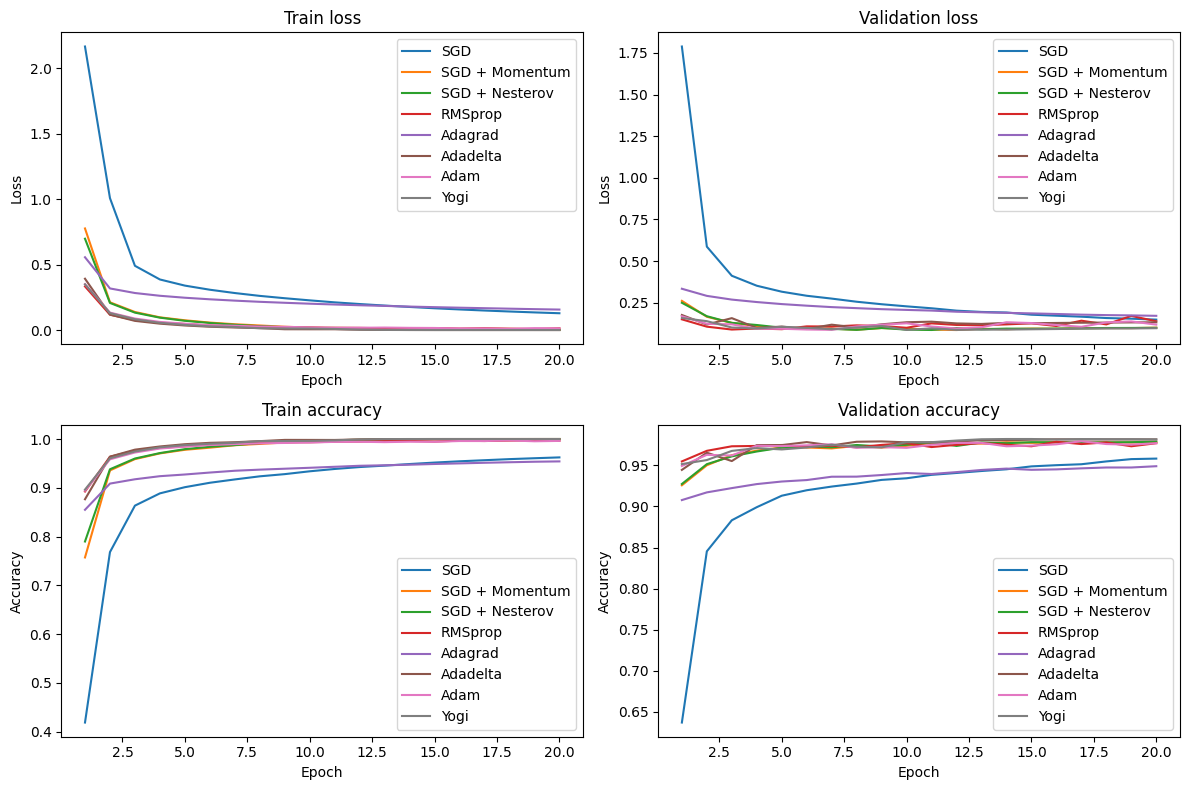

In [ ]:
import matplotlib.pyplot as plt
epochs = np.arange(1, num_epochs + 1)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Train loss
ax = axes[0, 0]
for opt_name, hist in all_histories.items():
    ax.plot(epochs, hist["train_loss"], label=opt_name)
ax.set_title("Train loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.legend()

# 2. Val loss
ax = axes[0, 1]
for opt_name, hist in all_histories.items():
    ax.plot(epochs, hist["val_loss"], label=opt_name)
ax.set_title("Validation loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.legend()

# 3. Train accuracy
ax = axes[1, 0]
for opt_name, hist in all_histories.items():
    train_acc = [float(a.cpu()) for a in hist["train_acc"]]
    ax.plot(epochs, train_acc, label=opt_name)
ax.set_title("Train accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()

# 4. Val accuracy
ax = axes[1, 1]
for opt_name, hist in all_histories.items():
    train_acc = [float(a.cpu()) for a in hist["val_acc"]]
    ax.plot(epochs, train_acc, label=opt_name)
ax.set_title("Validation accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()
plt.tight_layout()
plt.show()


#### Mô tả thực nghiệm và đánh giá

Với mô hình MLP, chúng tôi huấn luyện trên cùng một tập dữ liệu trong 20 epoch với 8 thuật toán tối ưu. Nhóm thuật toán cơ sở gồm SGD, SGD kèm Momentum, SGD kèm Nesterov, RMSprop và Adagrad; nhóm thuật toán nghiên cứu của đề tài gồm Adadelta, Adam và Yogi (một biến thể của Adam).

Ở nhóm cơ sở, SGD thuần cho quỹ đạo hội tụ khá “đều”, nhưng tốc độ tăng độ chính xác tương đối chậm: phải tới gần cuối 20 epoch mới đạt Best val Acc ≈ 0.958. Khi bổ sung momentum (SGD + Momentum, SGD + Nesterov), tốc độ hội tụ cải thiện rõ rệt: ngay vài epoch đầu, validation accuracy đã vượt 0.95 và Best val Acc đạt khoảng 0.978–0.979, vượt xa SGD thuần. Trong đó, Nesterov nhỉnh hơn đôi chút so với momentum cổ điển. RMSprop cũng cho hội tụ nhanh và độ chính xác cuối khá cao (Best val Acc ≈ 0.979), nhưng đường val_loss dao động lớn hơn ở giai đoạn sau, thể hiện cập nhật tham số có phần kém ổn định hơn. Ngược lại, Adagrad tăng đều và tương đối ổn định, nhưng dừng ở mức thấp hơn các thuật toán khác (Best val Acc ≈ 0.949), phù hợp với đặc trưng bước học giảm dần khiến thuật toán dễ bị “đuối” ở cuối quá trình tối ưu.

So với nhóm cơ sở, ba thuật toán nghiên cứu (Adadelta, Adam, Yogi) đều đạt mức hiệu năng cao hơn hoặc ít nhất là tương đương các thuật toán tốt nhất trong nhóm cơ sở. Adadelta cho hội tụ rất nhanh: chỉ sau 2–3 epoch, validation accuracy đã đạt trên 0.96 và Best val Acc ≈ 0.9818, cao hơn hầu hết thuật toán cơ sở. Tuy nhiên, train_loss giảm về gần 0 trong khi val_loss tăng nhẹ ở giai đoạn cuối, cho thấy xu hướng khớp huấn luyện rất mạnh và có dấu hiệu overfitting nhẹ. Adam cũng hội tụ nhanh, là một trong các thuật toán đạt val_acc cao sớm, với Best val Acc ≈ 0.9795, tương đương hoặc nhỉnh hơn Nesterov/RMSprop. Đường val_loss của Adam dao động hơn Adadelta, phản ánh đặc trưng cập nhật thích nghi khá “nhạy”, nhưng vẫn duy trì được khả năng khái quát hoá tốt. Yogi, với cơ chế điều chỉnh moment bậc hai thận trọng hơn so với Adam, cho kết quả tốt nhất trên MLP: Best val Acc đạt khoảng 0.9822, đồng thời đường val_acc ổn định quanh mức 0.98 trong các epoch cuối, chứng tỏ sự cân bằng tốt giữa tốc độ hội tụ và độ ổn định của nghiệm.

Tóm lại, trên mô hình MLP, các thuật toán nhóm nghiên cứu Adadelta, Adam, Yogi đều vượt trội so với SGD thuần và Adagrad, và cạnh tranh hoặc nhỉnh hơn so với các biến thể SGD có momentum và RMSprop. Trong đó, Yogi cho hiệu năng tổng thể tốt nhất, Adadelta hội tụ rất nhanh nhưng có xu hướng khớp huấn luyện mạnh, còn Adam đóng vai trò là lựa chọn cân bằng, dễ dùng, với hiệu năng sát nhóm tốt nhất và ổn định trên nhiều epoch.

---
#### 5. Gợi ý lựa chọn thuật toán theo bối cảnh ứng dụng

Việc lựa chọn thuật toán tối ưu không nên mang tính duy ý chí mà phải dựa
 trên bối cảnh ứng dụng cụ thể. Từ những phân tích tổng quát, có thể đưa ra
 các định hướng như sau:

* Bài toán đơn giản, gradient ổn định: Các thuật toán dựa trên SGD,
 đặc biệt là Momentum và Nesterov, thường cho kết quả ổn định và khả
 năng khái quát hóa tốt, đồng thời chi phí tính toán thấp.

* Mô hình sâu hoặc tham số lớn: Adam hoặc RMSprop thường là lựa
 chọn phù hợp vì khả năng điều chỉnh tốc độ học tự động và hội tụ nhanh.

* Dữ liệu có nhiều nhiễu hoặc gradient dao động mạnh: Yogi cho
 thấy tính ổn định cao và tránh được hiện tượng phân kỳ nhờ cơ chế điều
 chỉnh Momen chặt chẽ.

* Bài toán yêu cầu tối thiểu hóa tác động của siêu tham số: Adadelta
 là lựa chọn hợp lý vì không yêu cầu thiết lập tốc độ học ban đầu và vẫn
 duy trì hiệu năng tốt.

 Những gợi ý này mang tính định hướng và có thể được điều chỉnh dựa trên
 thực nghiệm cụ thể của từng mô hình.